In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN

In [2]:
# Loading
data = np.load('feature_vector_v1.npy')
# Scaling
# data = MinMaxScaler().fit_transform(data)
data = StandardScaler().fit_transform(data)

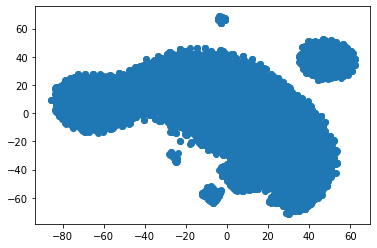

In [3]:
# t-SNE visualization
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

In [4]:
# PCA
pca = PCA(n_components=16)
kpca = KernelPCA(n_components=8, kernel='rbf', gamma=0.1)
data_pca = pca.fit_transform(data)
data_kpca = kpca.fit_transform(data)

One-class SVM: 115


([], [])

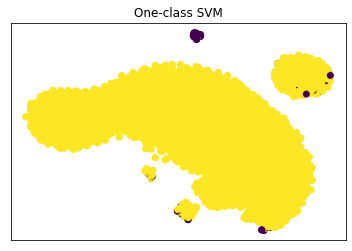

In [14]:
# One-class SVM
# ocsvm = OneClassSVM(kernel='linear')
ocsvm = OneClassSVM(nu=0.01, kernel='rbf', gamma=0.1)
ocsvm.fit(data_pca)
label_ocsvm = ocsvm.predict(data_pca)
outlier_idx_ocsvm = np.where(label_ocsvm == -1)[0]
print('One-class SVM: ' + str(len(outlier_idx_ocsvm)))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=label_ocsvm)
plt.title('One-class SVM')
plt.xticks([])
plt.yticks([])

DBSCAN: 139


([], [])

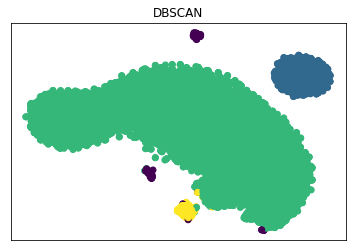

In [13]:
# DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=100)
dbscan.fit(data_kpca)
label_dbscan = dbscan.labels_
outlier_idx_dbscan = np.where(label_dbscan == -1)[0]
print('DBSCAN: ' + str(len(outlier_idx_dbscan)))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=label_dbscan)
plt.title('DBSCAN')
plt.xticks([])
plt.yticks([])

In [7]:
# idx2value
value2idx = np.load('./simple_feature2idx.npy', allow_pickle=True)

value2idx是值->索引的速查表，现在需要根据索引查PPID，定义一个查找函数

In [8]:
def get_dict_key(dic, value):
    keys = list(dic.keys())
    values = list(dic.values())
    idx = values.index(value)
    key = keys[idx]
    
    return key

Intersection: 68


([], [])

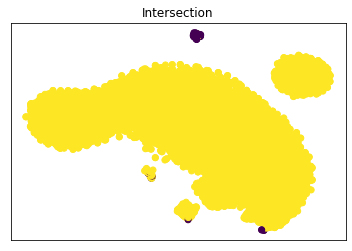

In [12]:
outlier_idx_common = list(set(outlier_idx_ocsvm) & set(outlier_idx_dbscan))
print('Intersection: ' + str(len(outlier_idx_common)))

label_common = []
for i in range(data.shape[0]):
    label_common.append(-1 if i in set(outlier_idx_common) else 1)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=label_common)
plt.title('Intersection')
plt.xticks([])
plt.yticks([])

In [10]:
outlier_PPID_ocsvm = []
for idx in outlier_idx_ocsvm:
    outlier_PPID_ocsvm.append(get_dict_key(value2idx.item()['PPID'], idx))

print('Outlier PPID found by One-class SVM:')
print(outlier_PPID_ocsvm)

outlier_PPID_dbscan = []
for idx in outlier_idx_dbscan:
    outlier_PPID_dbscan.append(get_dict_key(value2idx.item()['PPID'], idx))

print('Outlier PPID found by DBSCAN:')
print(outlier_PPID_dbscan)

outlier_PPID_common = []
for idx in outlier_idx_common:
    outlier_PPID_common.append(get_dict_key(value2idx.item()['PPID'], idx))

print('Outlier PPID in intersection: ')
print(outlier_PPID_common)

Outlier PPID found by One-class SVM:
['210204199308211008', '220303196801161984', '210282199310086016', '211381199210120992', '211382199211151008', '220581199304020000', '210212199310044992', '411481199307185984', '220721199011232992', '210323199203095008', '210213199312032992', '21012419930825061X', '211221199012049984', '341227199305204992', '410881199303011968', '620423199103139968', '210381199008024992', '440301196007200000', '150404199403111008', '211404199106063008', '41022519910618107X', '341222199109227008', '211002199206264992', '210623199304049984', '220122199211163008', '210411199207131008', '522631199108289984', '210782199202251008', '652925199103260032', '220381199302265984', '362502199310182016', '522422199104182016', '211021199303252992', '220723199402060000', '622727199202019968', '62232319900510663X', '342222199303016000', '210381199401160992', '530422199202211008', '220723199502120992', '220723199312040000', '410185198911192000', '653101199104013952', '632126199110292